In [17]:
import yaml
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

import custom_plotting as cp

import pickle

In [30]:
with open('./dataset/whitened_oversample_dataset', 'rb') as handle:
    oversampled_dataset = pickle.load(handle)

In [31]:
# 30% examples in test data
train = oversampled_dataset['train']
test = oversampled_dataset['test']
train_labels = oversampled_dataset['train_labels']
test_labels = oversampled_dataset['test_labels']
features = oversampled_dataset['features']

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu', solver='adam', max_iter=500)
mlp.fit(train,train_labels)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
# Training set predictions (to demonstrate overfitting)
train_rf_predictions = mlp.predict(train)
train_rf_probs = mlp.predict_proba(train)[:, 1]

# Testing set predictions
rf_predictions = mlp.predict(test)
rf_probs = mlp.predict_proba(test)[:, 1]


RecallBaseline: 1.0 Test: 0.08 Train: 0.97
PrecisionBaseline: 0.04 Test: 0.08 Train: 1.0
RocBaseline: 0.5 Test: 0.65 Train: 1.0


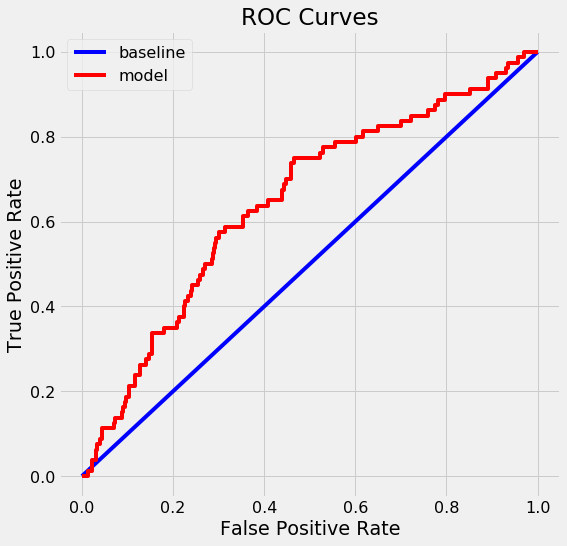

In [28]:
cp.evaluate_model(test_labels, rf_predictions, rf_probs, train_labels, train_rf_predictions, train_rf_probs)


[[1886   69]
 [  74    6]]


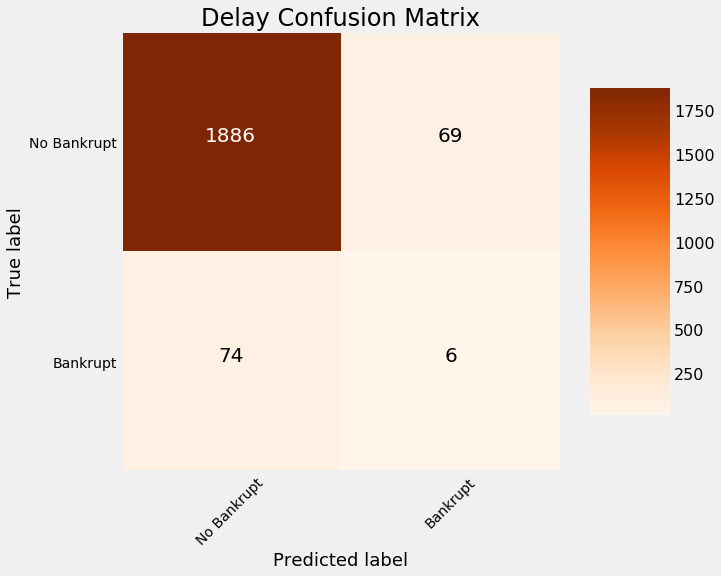

In [29]:
# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
cp.plot_confusion_matrix(cm, classes = ['No Bankrupt', 'Bankrupt'],
                      title = 'Delay Confusion Matrix')


In [9]:
# Extract feature importances
fi = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

fi.plot.bar(x='feature', figsize=(20,10))


NameError: name 'model' is not defined